# Chapter 10

In [1]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## 1. 퍼셉트론(perceptron)

### iris data를 이용한 perceptron 구현

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa)인가?

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred # 부채붓꽃이라고 예측

array([1])

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


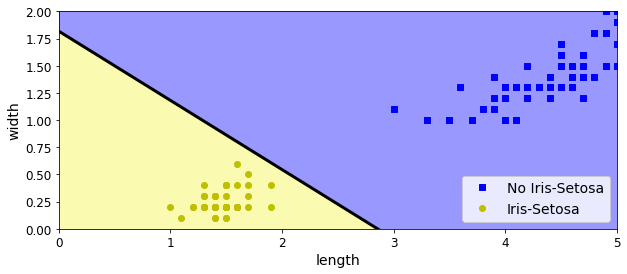

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="No Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3) # 집단 구분선
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("length", fontsize=14)
plt.ylabel("width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

## 2. 활성화함수(activation function)

In [5]:
def logit(z): # logistic(sigmoid) function
    return 1 / (1 + np.exp(-z))

def relu(z): # ReLU function
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001): # 미분(도함수)
    return (f(z + eps) - f(z - eps))/(2 * eps)

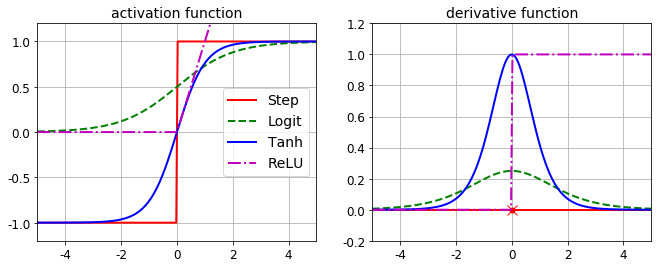

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step") # step function
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit") # logistic(sigmoid) function
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh") # hyperbolic tangent function
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU") # rectified linear unit function
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("activation function", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122) # derivative function
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("derivative function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [7]:
def heaviside(z): # heaviside function
    return (z >= 0).astype(z.dtype)

def sigmoid(z): # sigmoid function
    return 1 / (1 + np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside): # XOR(Exclusive OR) problem
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

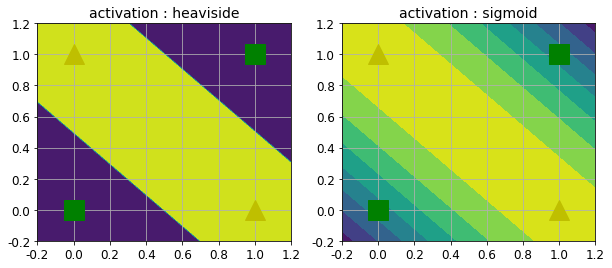

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("activation : heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("activation : sigmoid", fontsize=14)
plt.grid(True)

plt.show()

## 3. tensorflow의 고수준 API로 다층 퍼셉트론 훈련하기
### 예제
- MNIST를 이용한 FNN(feed forward neural network)
- 은닉층 2개(각각의 뉴런 수는 300개와 100개)와 10개의 뉴런을 가진 소프트맥스 출력층 하나로 구성된 분류 문제용 심층 신경망(DNN : deep neural network)을 훈련시킴

In [9]:
import tensorflow as tf

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # training set, test set 구분
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0 # 정규화(normalization)
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0 # 정규화(normalization)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:] # training set을 다시 훈련용, 검증용으로 구분
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
# Estimator API 사용
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

W1013 20:36:29.000164 16056 estimator.py:1811] Using temporary folder as model directory: C:\Users\HSY\AppData\Local\Temp\tmphh6b0jze
W1013 20:36:29.016122 16056 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W1013 20:36:29.026096 16056 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W1013 20:36:29.028091 16056 deprecation.py:323] From C:\Progra

In [12]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

W1013 21:00:53.897912 16056 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [13]:
eval_results

{'accuracy': 0.9805,
 'average_loss': 0.09601516,
 'loss': 12.153818,
 'global_step': 44000}

In [14]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

{'logits': array([ -4.7766185,  -0.8041911,   5.2236648,  10.268443 ,  -5.075437 ,
         -3.8045754, -18.417067 ,  25.790934 ,   4.3653793,   9.234144 ],
       dtype=float32),
 'probabilities': array([5.3049396e-14, 2.8176283e-12, 1.1688228e-09, 1.8141277e-07,
        3.9346415e-14, 1.4022769e-13, 6.3198874e-20, 9.9999964e-01,
        4.9545001e-10, 6.4487800e-08], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

- `tf.contrib.learn`을 사용
  - 1. 훈련 세트로부터 실숫값으로 된 열을 만듬
  - 2. DNNClassifier의 객체를 만들고 scikit-learn interface와 호환되게 만들어주는 SKCompat class로 감쌈
  - 3. sample이 50개인 batch로 훈련을 40000번 반복

In [15]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
tf.logging.set_verbosity(tf.logging.INFO)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

W1013 21:01:06.164312 16056 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1013 21:01:06.165693 16056 deprecation.py:323] From <ipython-input-15-3991cdd55b5b>:1: RunConfig.__init__ (from tensorflow.contrib.learn.python.learn.estimators.run_config) is deprecated and will be removed in a future version.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
W1013 21:01:06.166334 16056 deprecation.py:323] From <ipython-input-15-3991cdd55b5b>:3: infer_real_valued_columns_from_input (from tensorflow.contrib.learn.python.learn.estimators.estimator) is deprecated and will be removed in a future version.
Instruct

I1013 21:01:11.031296 16056 basic_session_run_hooks.py:260] loss = 0.18978412, step = 1101 (0.248 sec)
I1013 21:01:11.356423 16056 basic_session_run_hooks.py:692] global_step/sec: 301.103
I1013 21:01:11.358418 16056 basic_session_run_hooks.py:260] loss = 0.15242305, step = 1201 (0.327 sec)
I1013 21:01:11.670630 16056 basic_session_run_hooks.py:692] global_step/sec: 318.261
I1013 21:01:11.674573 16056 basic_session_run_hooks.py:260] loss = 0.19233221, step = 1301 (0.316 sec)
I1013 21:01:12.053561 16056 basic_session_run_hooks.py:692] global_step/sec: 261.143
I1013 21:01:12.055629 16056 basic_session_run_hooks.py:260] loss = 0.05157445, step = 1401 (0.381 sec)
I1013 21:01:12.428555 16056 basic_session_run_hooks.py:692] global_step/sec: 266.671
I1013 21:01:12.431548 16056 basic_session_run_hooks.py:260] loss = 0.09898743, step = 1501 (0.376 sec)
I1013 21:01:12.792613 16056 basic_session_run_hooks.py:692] global_step/sec: 274.682
I1013 21:01:12.796575 16056 basic_session_run_hooks.py:260] 

I1013 21:01:27.537248 16056 basic_session_run_hooks.py:692] global_step/sec: 285.627
I1013 21:01:27.540253 16056 basic_session_run_hooks.py:260] loss = 0.038993515, step = 5501 (0.350 sec)
I1013 21:01:27.885279 16056 basic_session_run_hooks.py:692] global_step/sec: 288.161
I1013 21:01:27.888269 16056 basic_session_run_hooks.py:260] loss = 0.064235024, step = 5601 (0.348 sec)
I1013 21:01:28.237336 16056 basic_session_run_hooks.py:692] global_step/sec: 283.239
I1013 21:01:28.240366 16056 basic_session_run_hooks.py:260] loss = 0.012605688, step = 5701 (0.352 sec)
I1013 21:01:28.582411 16056 basic_session_run_hooks.py:692] global_step/sec: 290.521
I1013 21:01:28.585403 16056 basic_session_run_hooks.py:260] loss = 0.011856756, step = 5801 (0.344 sec)
I1013 21:01:28.940562 16056 basic_session_run_hooks.py:692] global_step/sec: 278.538
I1013 21:01:28.943471 16056 basic_session_run_hooks.py:260] loss = 0.06501914, step = 5901 (0.359 sec)
I1013 21:01:29.286528 16056 basic_session_run_hooks.py:6

I1013 21:01:39.752223 16056 basic_session_run_hooks.py:260] loss = 0.004757972, step = 9801 (0.240 sec)
I1013 21:01:40.004243 16056 basic_session_run_hooks.py:692] global_step/sec: 393.74
I1013 21:01:40.006272 16056 basic_session_run_hooks.py:260] loss = 0.015301727, step = 9901 (0.254 sec)
I1013 21:01:40.277258 16056 basic_session_run_hooks.py:692] global_step/sec: 366.28
I1013 21:01:40.280252 16056 basic_session_run_hooks.py:260] loss = 0.0065700794, step = 10001 (0.274 sec)
I1013 21:01:40.580065 16056 basic_session_run_hooks.py:692] global_step/sec: 330.244
I1013 21:01:40.582308 16056 basic_session_run_hooks.py:260] loss = 0.0062209875, step = 10101 (0.302 sec)
I1013 21:01:40.893203 16056 basic_session_run_hooks.py:692] global_step/sec: 319.348
I1013 21:01:40.896175 16056 basic_session_run_hooks.py:260] loss = 0.0052664853, step = 10201 (0.314 sec)
I1013 21:01:41.220410 16056 basic_session_run_hooks.py:692] global_step/sec: 305.853
I1013 21:01:41.223117 16056 basic_session_run_hooks

I1013 21:01:55.357113 16056 basic_session_run_hooks.py:692] global_step/sec: 276.049
I1013 21:01:55.359106 16056 basic_session_run_hooks.py:260] loss = 0.0043626563, step = 14201 (0.361 sec)
I1013 21:01:55.731872 16056 basic_session_run_hooks.py:692] global_step/sec: 267.555
I1013 21:01:55.733986 16056 basic_session_run_hooks.py:260] loss = 0.0006721047, step = 14301 (0.375 sec)
I1013 21:01:56.082965 16056 basic_session_run_hooks.py:692] global_step/sec: 284.013
I1013 21:01:56.085956 16056 basic_session_run_hooks.py:260] loss = 0.00080510706, step = 14401 (0.352 sec)
I1013 21:01:56.442733 16056 basic_session_run_hooks.py:692] global_step/sec: 277.957
I1013 21:01:56.445726 16056 basic_session_run_hooks.py:260] loss = 0.001059685, step = 14501 (0.360 sec)
I1013 21:01:56.799809 16056 basic_session_run_hooks.py:692] global_step/sec: 280.052
I1013 21:01:56.803860 16056 basic_session_run_hooks.py:260] loss = 0.004557342, step = 14601 (0.357 sec)
I1013 21:01:57.179118 16056 basic_session_run_

I1013 21:02:11.140015 16056 basic_session_run_hooks.py:692] global_step/sec: 276.298
I1013 21:02:11.143007 16056 basic_session_run_hooks.py:260] loss = 0.0005834189, step = 18501 (0.361 sec)
I1013 21:02:11.503890 16056 basic_session_run_hooks.py:692] global_step/sec: 274.819
I1013 21:02:11.506901 16056 basic_session_run_hooks.py:260] loss = 0.001871591, step = 18601 (0.364 sec)
I1013 21:02:11.880836 16056 basic_session_run_hooks.py:692] global_step/sec: 265.29
I1013 21:02:11.883881 16056 basic_session_run_hooks.py:260] loss = 0.0009047134, step = 18701 (0.377 sec)
I1013 21:02:12.242163 16056 basic_session_run_hooks.py:692] global_step/sec: 276.757
I1013 21:02:12.245158 16056 basic_session_run_hooks.py:260] loss = 0.002257539, step = 18801 (0.361 sec)
I1013 21:02:12.605366 16056 basic_session_run_hooks.py:692] global_step/sec: 275.328
I1013 21:02:12.609430 16056 basic_session_run_hooks.py:260] loss = 0.0028842867, step = 18901 (0.364 sec)
I1013 21:02:12.979936 16056 basic_session_run_ho

I1013 21:02:26.385063 16056 basic_session_run_hooks.py:692] global_step/sec: 274.849
I1013 21:02:26.388061 16056 basic_session_run_hooks.py:260] loss = 0.0012767707, step = 22801 (0.364 sec)
I1013 21:02:26.750970 16056 basic_session_run_hooks.py:692] global_step/sec: 274.076
I1013 21:02:26.752914 16056 basic_session_run_hooks.py:260] loss = 0.002038735, step = 22901 (0.365 sec)
I1013 21:02:27.111090 16056 basic_session_run_hooks.py:692] global_step/sec: 276.882
I1013 21:02:27.114032 16056 basic_session_run_hooks.py:260] loss = 0.00078008394, step = 23001 (0.361 sec)
I1013 21:02:27.473367 16056 basic_session_run_hooks.py:692] global_step/sec: 276.032
I1013 21:02:27.476357 16056 basic_session_run_hooks.py:260] loss = 0.0037970394, step = 23101 (0.362 sec)
I1013 21:02:27.832929 16056 basic_session_run_hooks.py:692] global_step/sec: 278.116
I1013 21:02:27.835921 16056 basic_session_run_hooks.py:260] loss = 0.0021016893, step = 23201 (0.360 sec)
I1013 21:02:28.210808 16056 basic_session_run

I1013 21:02:40.721058 16056 basic_session_run_hooks.py:692] global_step/sec: 285.618
I1013 21:02:40.724047 16056 basic_session_run_hooks.py:260] loss = 0.00055531814, step = 27101 (0.351 sec)
I1013 21:02:41.095940 16056 basic_session_run_hooks.py:692] global_step/sec: 266.057
I1013 21:02:41.098939 16056 basic_session_run_hooks.py:260] loss = 0.0004577894, step = 27201 (0.376 sec)
I1013 21:02:41.450155 16056 basic_session_run_hooks.py:692] global_step/sec: 282.314
I1013 21:02:41.453149 16056 basic_session_run_hooks.py:260] loss = 0.0008270182, step = 27301 (0.354 sec)
I1013 21:02:41.805174 16056 basic_session_run_hooks.py:692] global_step/sec: 281.675
I1013 21:02:41.808094 16056 basic_session_run_hooks.py:260] loss = 0.00013196227, step = 27401 (0.354 sec)
I1013 21:02:42.141409 16056 basic_session_run_hooks.py:692] global_step/sec: 297.411
I1013 21:02:42.143406 16056 basic_session_run_hooks.py:260] loss = 0.0015038665, step = 27501 (0.336 sec)
I1013 21:02:42.500004 16056 basic_session_r

I1013 21:02:54.599105 16056 basic_session_run_hooks.py:692] global_step/sec: 356.756
I1013 21:02:54.602100 16056 basic_session_run_hooks.py:260] loss = 0.0009989394, step = 31401 (0.281 sec)
I1013 21:02:54.884160 16056 basic_session_run_hooks.py:692] global_step/sec: 350.81
I1013 21:02:54.886152 16056 basic_session_run_hooks.py:260] loss = 0.0005088181, step = 31501 (0.284 sec)
I1013 21:02:55.165832 16056 basic_session_run_hooks.py:692] global_step/sec: 355.023
I1013 21:02:55.167992 16056 basic_session_run_hooks.py:260] loss = 0.0002357034, step = 31601 (0.282 sec)
I1013 21:02:55.427865 16056 basic_session_run_hooks.py:692] global_step/sec: 381.631
I1013 21:02:55.429938 16056 basic_session_run_hooks.py:260] loss = 0.0007148701, step = 31701 (0.262 sec)
I1013 21:02:55.686360 16056 basic_session_run_hooks.py:692] global_step/sec: 386.855
I1013 21:02:55.688356 16056 basic_session_run_hooks.py:260] loss = 0.00019623892, step = 31801 (0.258 sec)
I1013 21:02:55.940858 16056 basic_session_run

I1013 21:03:08.951799 16056 basic_session_run_hooks.py:692] global_step/sec: 309.276
I1013 21:03:08.953796 16056 basic_session_run_hooks.py:260] loss = 0.0006954838, step = 35701 (0.323 sec)
I1013 21:03:09.254037 16056 basic_session_run_hooks.py:692] global_step/sec: 331.014
I1013 21:03:09.256036 16056 basic_session_run_hooks.py:260] loss = 0.00069772976, step = 35801 (0.302 sec)
I1013 21:03:09.560872 16056 basic_session_run_hooks.py:692] global_step/sec: 324.913
I1013 21:03:09.562903 16056 basic_session_run_hooks.py:260] loss = 0.0005991817, step = 35901 (0.307 sec)
I1013 21:03:09.913754 16056 basic_session_run_hooks.py:692] global_step/sec: 284.06
I1013 21:03:09.915749 16056 basic_session_run_hooks.py:260] loss = 0.00038228312, step = 36001 (0.353 sec)
I1013 21:03:10.282485 16056 basic_session_run_hooks.py:692] global_step/sec: 270.581
I1013 21:03:10.285628 16056 basic_session_run_hooks.py:260] loss = 0.0013903326, step = 36101 (0.370 sec)
I1013 21:03:10.631312 16056 basic_session_ru

I1013 21:03:22.133144 16056 basic_session_run_hooks.py:606] Saving checkpoints for 40000 into C:\Users\HSY\AppData\Local\Temp\tmp7j2kn69k\model.ckpt.
I1013 21:03:22.338805 16056 estimator.py:525] Loss for final step: 0.0003840291.


SKCompat()

In [16]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes']) # 정확도

I1013 21:07:49.286122 16056 monitored_session.py:240] Graph was finalized.
I1013 21:07:49.295902 16056 saver.py:1280] Restoring parameters from C:\Users\HSY\AppData\Local\Temp\tmp7j2kn69k\model.ckpt-40000
I1013 21:07:49.328796 16056 session_manager.py:500] Running local_init_op.
I1013 21:07:49.345445 16056 session_manager.py:502] Done running local_init_op.


0.9819

In [17]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba) # 최종 loss function의 값

0.07382669614672797

## 4. tensorflow의 저수준 API로 심층 신경망 훈련하기

In [18]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300 # 은닉층1 : 300개 뉴런
n_hidden2 = 100 # 은닉층2 : 100개 뉴런
n_outputs = 10 # 출력층 : 10개 뉴런 (0부터 9까지의 자연수 구분)

In [19]:
reset_graph() # 기본 그래프 초기화

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X") # 입력층의 역할
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [20]:
# 한번에 한 개 층씩 만들기 위한 neuron_layer() 함수
# 매개변수 : 입력, 뉴런수, 활성화함수, 층이름
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1]) # 입력행렬의 크기에서 두번째 차원을 사용해 입력특성의 수를 구함 (첫번째 차원은 샘플의 수)
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev) # 절단정규분포를 사용해 무작위로 초기화 (경사하강법 알고리즘이 중단되지 않도록 대칭성을 피하기 위함)
        W = tf.Variable(init, name="kernel") # 가중치행렬을 담을 W 변수
        b = tf.Variable(tf.zeros([n_neurons]), name="bias") # 편향(bias)을 만들고 0으로 초기화
        Z = tf.matmul(X, W) + b # Z = XW + b 를 계산하기 위한 그래프 구현 
        if activation is not None: # 매개변수가 지정되어 있으면 activation(Z) 반환, 그렇지 않으면 Z 반환
            return activation(Z)
        else:
            return Z

In [21]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs") # 활성화함수로 들어가기 직전의 신경망을 출력

In [22]:
# 위의 neuron_layer() 함수는 다음과 같이 dense() 함수로 간단하게 대신할 수 있음
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

W1013 21:08:10.104412 16056 deprecation.py:323] From <ipython-input-22-d30e8537657e>:4: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [23]:
# 비용함수 cross entropy 계산 후 평균내기
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [24]:
learning_rate = 0.01
# 경사하강법을 이용하여 비용함수를 최소화시키도록 model parameter를 조정
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [25]:
# 모델 평가방법 지정
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1) # Boolean 값으로 채워진 1D tensor를 반환 (예측값과 타깃 레이블을 입력받아 타깃 레이블의 예측값이 크기순으로 k번째 안에 들면 True, 그렇지 않으면 False를 반환)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) # 정확도

In [26]:
init = tf.global_variables_initializer() # 모든 변수를 초기화하는 노드
saver = tf.train.Saver() # 훈련된 model parameter를 저장하기 위한 Saver 객체 생성

In [27]:
n_epochs = 40
batch_size = 50

In [28]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [29]:
# 모델훈련
with tf.Session() as sess:
    init.run() # 모든 변수 초기화
    for epoch in range(n_epochs): # 매 반복마다 훈련 데이터의 크기를 mini batch 크기로 나눈 횟수만큼 반복
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9022
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9222
2 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9316
3 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9382
4 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.944
5 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9484
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9524
7 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9574
8 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9602
9 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9626
10 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9638
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.965
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9654
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9696
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9698
15 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.972
16 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.973
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9724
18 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9726
19 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9726
20 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9744
21 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.974
22 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9748
23 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.976
24 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.974
25 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.976
26 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9758
27

In [30]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # 또는 save_path를 사용
    X_new_scaled = X_test[:20] # new image (0에서 1 사이로 스케일 조정)
    Z = logits.eval(feed_dict={X: X_new_scaled}) # logit node 평가
    y_pred = np.argmax(Z, axis=1)

I1013 21:29:04.795135 16056 saver.py:1280] Restoring parameters from ./my_model_final.ckpt


In [31]:
print("예측 클래스:", y_pred)
print("진짜 클래스:", y_test[:20])

예측 클래스: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
진짜 클래스: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
